## Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning

### Week 1 (Template for Keras)

In [ ]:
import tensorflow as tf
import numpy as np
import os

In [ ]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
model.fit(xs, ys, epochs=500)

In [ ]:
print(model.predict([10.0]))

### Week 2 (Simple DNN) & 3 (CNN)

In [47]:
import os
#print(os.environ)
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
#print(os.environ["CUDA_VISIBLE_DEVICES"])
import time

In [48]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.1.0
Num GPUs Available:  1


In [49]:
mnist = tf.keras.datasets.fashion_mnist

In [50]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

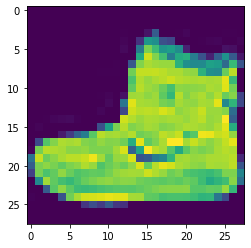

In [51]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
#print(training_labels[0])
#print(training_images[0])

In [66]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images_cnn=training_images.reshape(60000, 28, 28, 1)
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [67]:
print(training_images.shape)
print(test_images.shape)
print(training_images_cnn.shape)
print(test_images_cnn.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [56]:
modeldnn = tf.keras.models.Sequential([
                                    #tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Why doesn't it error out when last layer doesn't match number of classes?

modelcnn = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [63]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
        
modeldnn.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modelcnn.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modeldnn.summary()
modelcnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
dense_31 (Dense)             multiple                  401920    
_________________________________________________________________
dense_32 (Dense)             multiple                  262656    
_________________________________________________________________
dense_33 (Dense)             multiple                  5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
________________________

In [70]:

start = time.time()
#model.fit(training_images, training_labels, epochs=5, batch_size=128)
modeldnn.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])
end = time.time()
print(end - start)
test_loss = modeldnn.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6693 - accuracy: 0.7560
Epoch 2/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4474 - accuracy: 0.8367
Epoch 3/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3953 - accuracy: 0.8562
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3582 - accuracy: 0.8686
Epoch 5/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3316 - accuracy: 0.8782
Epoch 6/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3133 - accuracy: 0.8843
Epoch 7/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2997 - accuracy: 0.8883
Epoch 8/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2854 - accuracy: 0.8945
Epoch 9/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2758 - accuracy: 0.8966
Epoch 

In [72]:
test_loss = modeldnn.evaluate(test_images, test_labels)
print(test_loss)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.3455 - accuracy: 0.8833
[0.3454980036616325, 0.8833]


In [74]:
start = time.time()
#model.fit(training_images, training_labels, epochs=5, batch_size=128)
modelcnn.fit(training_images_cnn, training_labels, epochs=20, callbacks=[callbacks])
end = time.time()
print(end - start)
test_loss = modelcnn.evaluate(test_images_cnn, test_labels)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2342 - accuracy: 0.9105
Epoch 2/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2239 - accuracy: 0.9150
Epoch 3/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2153 - accuracy: 0.9175
Epoch 4/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2049 - accuracy: 0.9211
Epoch 5/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1968 - accuracy: 0.9244
Epoch 6/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1857 - accuracy: 0.9282
Epoch 7/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1762 - accuracy: 0.9309
Epoch 8/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1690 - accuracy: 0.9347
Epoch 9/20
60000/60000 [==============================] - 12s 205us/sample - loss: 0.1577 - accuracy: 0.9

In [ ]:
classifications = model.predict(test_images)

print(classifications[1])

In [79]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


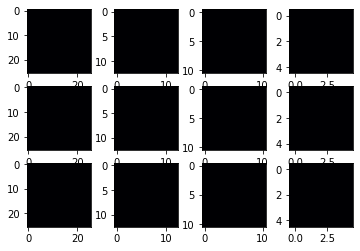

In [80]:
#not working

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in modelcnn.layers]
activation_model = tf.keras.models.Model(inputs = modelcnn.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images_cnn[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images_cnn[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images_cnn[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Week 3